In [348]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px

import os
from dotenv import load_dotenv

load_dotenv(os.path.join('.env'))

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

FRED_KEY = os.environ.get("FRED_KEY")

### 1. Create The FRED Object

In [349]:
fred = Fred(api_key = FRED_KEY)

### 2. Search for economic data

In [350]:
sp_search = fred.search('S&P', order_by='popularity')

In [351]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-06-28,2024-06-28,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-06-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-27 08:45:09-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-06-28,2024-06-28,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-06-25 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-06-28,2024-06-28,S&P 500,2014-06-30,2024-06-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-06-27 19:56:53-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-06-28,2024-06-28,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-06-28,2024-06-28,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-06-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-06-27 08:45:12-05:00,82,This data represents the effective yield of th...


### 3. Pull Raw Data

<Axes: title={'center': 'S&P 500'}>

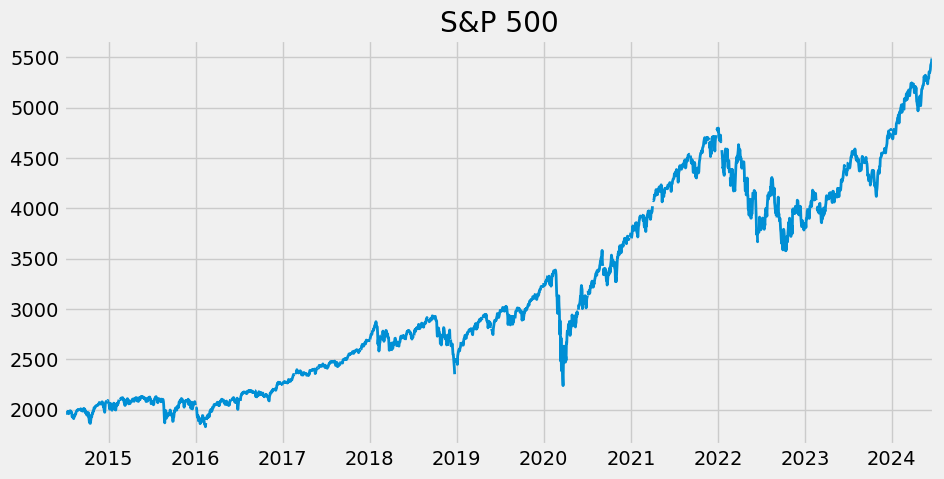

In [352]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

#### 2014-06-27	- 1$ = 183,5 тенге
### 1 S&P = 1960$ = 359 000 тенге

## 10 years later

#### 2024-06-26 - 1$ = 465,13 тенге
### 1 S&P = 5477.90$ = 2 547 935 тенге



### 4. Pull and Join Multiple Data Series

In [353]:
unemp_results=fred.search('unemployment')

In [354]:
unemp_df=fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df=unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [355]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unempt_results = pd.concat(all_results, axis=1).drop(['M08311USM156SNBR', 'M0892BUSM156SNBR', 'M0892AUSM156SNBR', \
                                                       'LNS14000006', 'LNS14000024', 'LNS14000031', 'LNS14000002', 'LNS14000009', \
                                                       'LNS14000003', 'LNS14000001','LNS14027660', 'U2RATE',\
                                                        'LNS14000001','LNS14027660', 'LNS14027662','LNS14024887','LRUN64TTUSM156S','LNS14032183','LNS14000012', 'LNS14027659','LASMT261982000000003','LNS14000060','LNS14000028','LASMT391746000000003','LNS14000018', \
                                                        'LNS14000036', 'LNS14000032','LNS14200000','LRUN24TTUSM156S','LNS14027689','LNS14100000','LNS14000315','LNS14000029','LRHUTTTTUSM156S','LNS14024230', \
                                                            'LNS14000025','LNS14000061','LRUNTTTTUSM156S','LNS14000026','LNS14000048','LNS14000089','LNS14000150','LRUN25TTUSM156S'], axis=1)

In [356]:
unemp_states=unempt_results.drop('UNRATE', axis=1)
unemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').drop(['M08311USM156SNBR', 'M0892BUSM156SNBR', 'M0892AUSM156SNBR', \
                                                       'LNS14000006', 'LNS14000024', 'LNS14000031', 'LNS14000002', 'LNS14000009', \
                                                       'LNS14000003', 'LNS14000001','LNS14027660', 'U2RATE',\
                                                        'LNS14000001','LNS14027660', 'LNS14027662','LNS14024887','LRUN64TTUSM156S','LNS14032183','LNS14000012', 'LNS14027659','LASMT261982000000003','LNS14000060','LNS14000028','LASMT391746000000003','LNS14000018', \
                                                        'LNS14000036', 'LNS14000032','LNS14200000','LRUN24TTUSM156S','LNS14027689','LNS14100000','LNS14000315','LNS14000029','LRHUTTTTUSM156S','LNS14024230', \
                                                            'LNS14000025','LNS14000061','LRUNTTTTUSM156S','LNS14000026','LNS14000048','LNS14000089','LNS14000150','LRUN25TTUSM156S']).to_dict()

unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]


In [357]:
# Create the line plot with custom size
fig = px.line(unemp_states, 
              title='Unemployment Rates by State',  # Adding a title for clarity
              width=800,  # Set the width of the figure
              height=600)  # Set the height of the figure


# Show the plot
fig.show()


### Pull April 2024 Unemployment Rate Per State

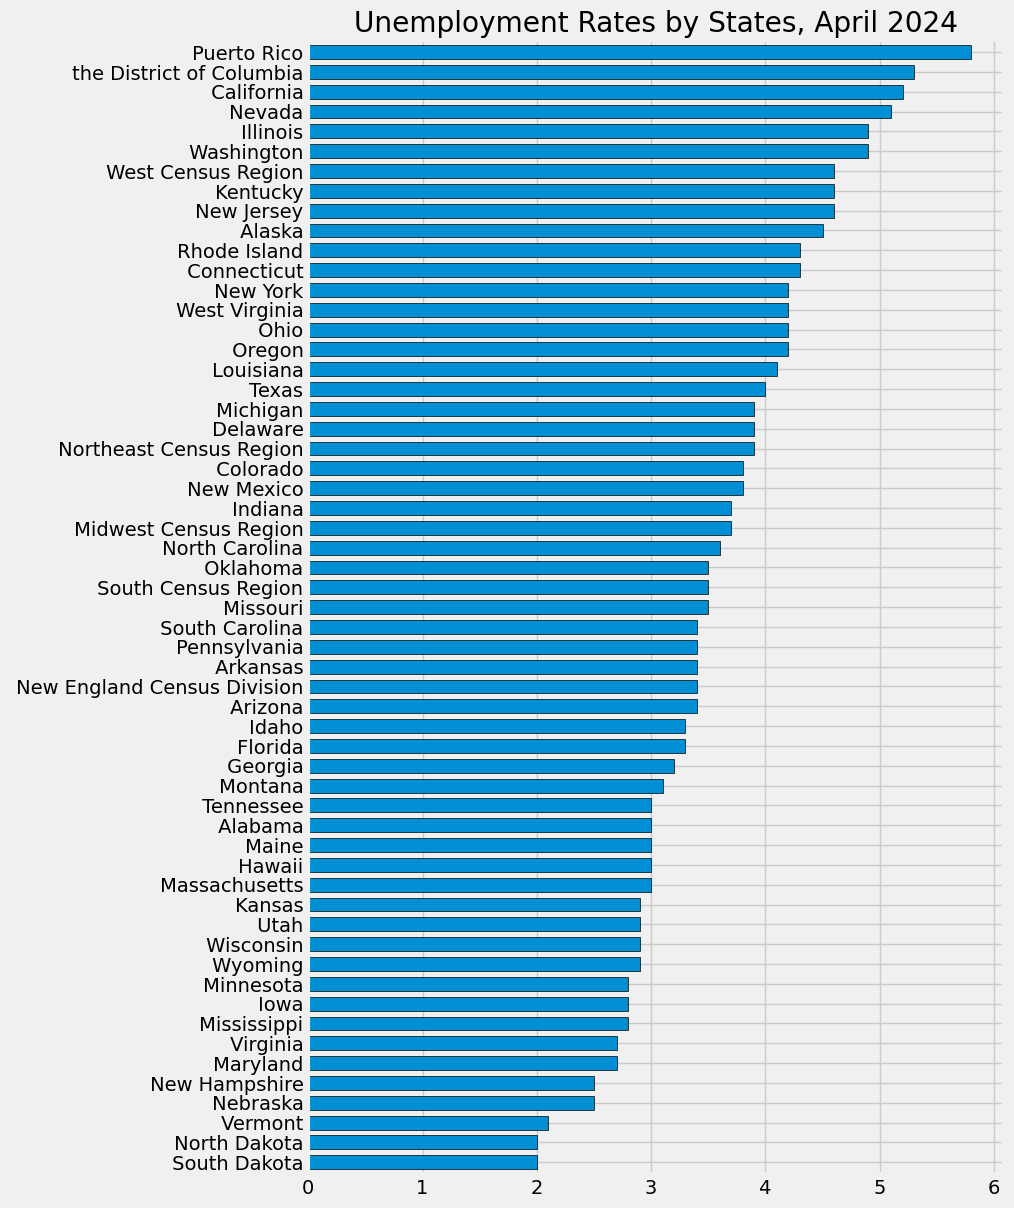

In [358]:
ax=unemp_states.loc[unemp_states.index == '2024-05-01'].T.sort_values('2024-05-01') \
      .sort_values('2024-05-01') \
      .plot(kind='barh', figsize=(8,14), width=0.7, edgecolor='black', title='Unemployment Rates by States, April 2024')

ax.legend().remove()
plt.show()

### Pull Participation Rate

In [359]:
part_df=fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df=part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')


In [360]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states= pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [361]:
part_states

,Labor Force Participation Rate,Labor Force Participation Rate - 25-54 Yrs.,Labor Force Participation Rate - Women,Labor Force Participation Rate - Men,Labor Force Participation Rate - 55 Yrs. & over,Labor Force Participation Rate - 16-19 Yrs.,Labor Force Participation Rate - Black or African American,Infra-Annual Labor Statistics: Labor Force Participation Rate Male: From 25 to 54 Years for United States,Labor Force Participation Rate - 20-24 Yrs.,Infra-Annual Labor Statistics: Labor Force Participation Rate Female: From 25 to 54 Years for United States,"Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over",California,"Labor Force Participation Rate - 20 Yrs. & over, White Men","Labor Force Participation Rate - 20 Yrs. & over, Black or African American Men",Alabama,Labor Force Participation Rate - White,"Labor Force Participation Rate - High School Graduates, No College, 25 Yrs. & over",New York,"Labor Force Participation Rate - 20 Yrs. & over, White Women",Michigan,Mississippi,Labor Force Participation Rate - Hispanic or Latino,"Labor Force Participation Rate - 20 Yrs. & over, Black or African American Women",Texas,Florida,Kentucky,Ohio,Wisconsin,Pennsylvania,Massachusetts,Minnesota,Maryland,West Virginia,Tennessee,"Labor Force Participation Rate - Less Than a High School Diploma, 25 Yrs. & over",Maine,Illinois,North Carolina,Georgia,Louisiana,South Carolina,Colorado,Utah,Virginia,Indiana,"Labor Force Participation Rate - 20 Yrs. & over, Women",Missouri,Infra-Annual Labor Statistics: Inactivity Rate Total: From 15 to 64 Years for United States,New Jersey,Infra-Annual Labor Statistics: Labor Force Participation Rate Total: From 15 to 64 Years for United States,Iowa,Alaska,"Labor Force Participation Rate - 20 Yrs. & over, Men",Washington,Arizona,New Mexico,"Labor Force Participation Rate - Some College or Associate Degree, 25 Yrs. & over",Idaho,Arkansas,Oklahoma,Nebraska,Hawaii,Nevada,Montana,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Infra-Annual Labor Statistics: Labor Force Participation Rate Total: From 55 to 64 Years for United States,Kansas,"Labor Force Participation Rate - 16-19 Yrs., White",Rhode Island,District Of Columbia,Delaware,Wyoming,"Labor Force Participation Rate - 16-19 Yrs., Black or African American",Infra-Annual Labor Statistics: Labor Force Participation Rate Total: From 15 to 24 Years for United States,Infra-Annual Labor Statistics: Labor Force Participation Rate Total: From 15 to 74 Years for United States,Infra-Annual Labor Statistics: Inactivity Rate Male: From 25 to 54 Years for United States,Infra-Annual Labor Statistics: Labor Force Participation Rate Female: 15 Years or over for United States,Infra-Annual Labor Statistics: Labor Force Participation Rate Total: From 25 to 54 Years for United States,Infra-Annual Labor Statistics: Labor Force Participation Rate Total: 15 Years or over for United States,Infra-Annual Labor Statistics: Labor Force Participation Rate Male: 15 Years or over for United States,Infra-Annual Labor Statistics: Labor Force Participation Rate Male: From 55 to 64 Years for United States,Infra-Annual Labor Statistics: Labor Force Participation Rate Female: From 15 to 64 Years for United States,Infra-Annual Labor Statistics: Labor Force Participation Rate Female: From 55 to 64 Years for United States,Infra-Annual Labor Statistics: Labor Force Participation Rate Male: From 15 to 24 Years for United States,Infra-Annual Labor Statistics: Labor Force Participation Rate Female: From 15 to 74 Years for United States,Infra-Annual Labor Statistics: Labor Force Participation Rate Female: From 15 to 24 Years for United States,Infra-Annual Labor Statistics: Labor Force Participation Rate Male: From 15 to 64 Years for United States,Infra-Annual Labor Statistics: Labor Force Participation Rate Male: From 15 to 74 Years for United States,Infra-Annual Labor Statistics: Inactivity Rate Total: 15 Years or over for United States,Infra-Annual Labor Sta

### PLot Unemployment vs Participation

Text(0.5, 1.0, 'Unemplorment & Participation Rate in New York 2022-2024')

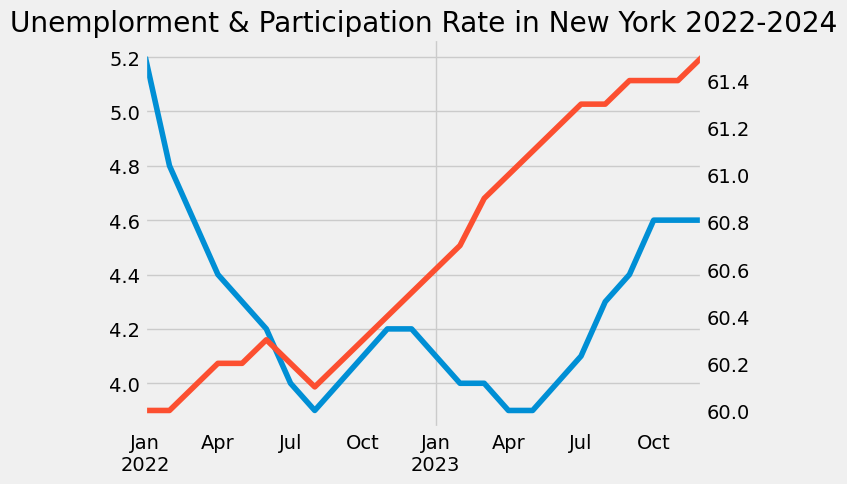

In [369]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index >= 2022 and index < 2024')[' New York']\
    .plot(ax=ax, label = 'Unemployment')
part_states.query('index >= 2022 and index < 2024')[' New York']\
    .plot(ax=ax2, label = 'Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title('Unemplorment & Participation Rate in New York 2022-2024')


In [363]:
unemp_states.columns

Index([' California', ' Texas', ' New York', ' Florida', ' Pennsylvania',
       ' Ohio', ' Michigan', ' Alabama', ' Massachusetts', ' North Carolina',
       ' Illinois', ' New Jersey', ' Georgia', ' Colorado', ' Arizona',
       ' Wisconsin', ' Virginia', ' Kentucky', ' South Carolina',
       ' New Mexico', ' Minnesota', ' Tennessee', ' Washington', ' Maryland',
       ' Oregon', ' West Virginia', ' Nevada', ' Arkansas', ' Oklahoma',
       ' Missouri', ' Alaska', ' Iowa', ' Utah', ' Puerto Rico', ' Indiana',
       ' Louisiana', ' Hawaii', ' North Dakota', ' Montana',
       ' the District of Columbia', ' Mississippi', ' Maine', ' Nebraska',
       ' Connecticut', ' Idaho', ' New Hampshire', ' Rhode Island', ' Kansas',
       ' Wyoming', ' Delaware', ' Vermont', ' South Dakota',
       ' Midwest Census Region', ' South Census Region',
       ' Northeast Census Region', ' West Census Region',
       ' New England Census Division'],
      dtype='object')